### Libraries

In [1]:
import networkx as nx
import numpy as np
import timeit
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power
import seaborn as sns

### Selecting some palettes for the plots

In [2]:
col = sns.color_palette('Set2')
col

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [3]:
col2 = sns.color_palette('deep')
col2

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

# PART 1

### Generating p-ER random graphs and r-regular random graph

In [4]:
# K number of nodes
k = 100

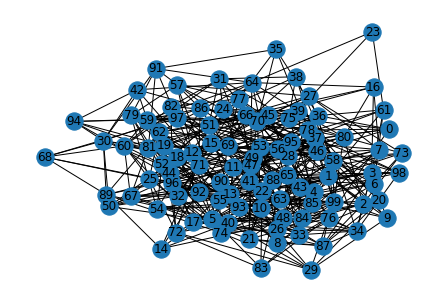

In [5]:
# ERDOS RENYI RANDOM GRAPH WITH K NODES
# setting the probability that there is an edge between two nodes
p = 0.1
G = nx.erdos_renyi_graph(k, p)
nx.draw(G, with_labels=True)
plt.show()

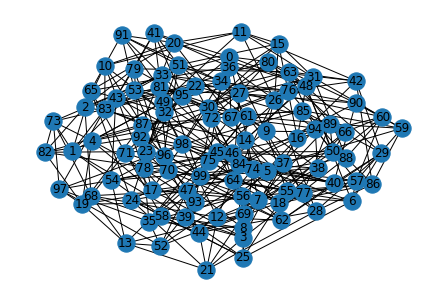

In [6]:
# R-REGULAR RANDOM GRAPH WITH K NODES 
# setting d the degree of each node in the graph 
d = 7
H = nx.random_regular_graph(d, k)
nx.draw(H, with_labels=True)
plt.show()

## Algorithms to check the connectivity of a given graph 

### Irreducibility

In [7]:
def algebraic_method_1(G,k):
    
    A = nx.to_numpy_array(G,dtype=np.float64)  # adjaceny matrix 
    B = np.identity(k,dtype=np.float64)        # initializing an identity matrix
    app = np.zeros((k,k),dtype=np.float64)     # initializing a matrix to compute the power of A
    for i in range(1,k):
        app += B
        B = np.matmul(B,A)
         
    return app

### Eigenvalue of the laplacian matrix

In [8]:
def algebraic_method_2(G, k):
    
    A = nx.to_numpy_array(G)    # adjacenncy matrix
    D = np.diag(sum(A))         # computing D, a diagonal matrix where each element is the out-degree of a node
    L = np.subtract(D, A)       # computing the laplacian of the graph
    w, v = np.linalg.eig(L)     # computing the eigenvalues and eigenvectors of L
    w = np.round(w, 10)         
    w_2 = sorted(w)[1]          # sorting the eigenvalues
    
    return w_2

### Breadth-first search

In [9]:
def bfs(graph, node):
    
    visited = []
    queue = []
    
    visited.append(node) # adding the starting node to the visited list
    queue.append(node)   # adding the starting node to the queue 
    
    # computing the breadth-first search
    while queue:   
        m = queue.pop(0)                     

        for neighbour in graph.neighbors(m):
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)

    return visited

## Comparing the complexity as a function of k for the methods above

We'll compare the complexity time using Erdos-Renyi graphs for K in (2,200)

In [10]:
# setting p
p = 0.5
# setting the number of iteration for the Monte Carlo simulation
M = 100

Computing the complexity time for the irreducibility method:

In [11]:
t_1 = []

for k in range(2, 201):
    m_1 = []
    for m in range(M):
        G = nx.erdos_renyi_graph(k,p)
        start = timeit.default_timer()
        algebraic_method_1(G,k)
        end = timeit.default_timer()
        m_1.append(end-start)
    t_1.append(sum(m_1)/M)

Computing the complexity time for the eigevalues method:

In [60]:
t_2 = []

for k in range(2, 201):
    m_2 = []
    for m in range(M):
        G = nx.erdos_renyi_graph(k, p)
        start = timeit.default_timer()
        algebraic_method_2(G, k)
        end = timeit.default_timer()
        m_2.append(end-start)
    t_2.append(sum(m_2)/M)

Computing the complexity time for the bread-first search:

In [61]:
t_3 = []

for k in range(2, 201):
    m_3 = []
    for m in range(M):
        G = nx.erdos_renyi_graph(k, p)
        start = timeit.default_timer()
        bfs(G, 1)
        end = timeit.default_timer()
        m_3.append(end-start)
    t_3.append(sum(m_3)/M)

### PLOT

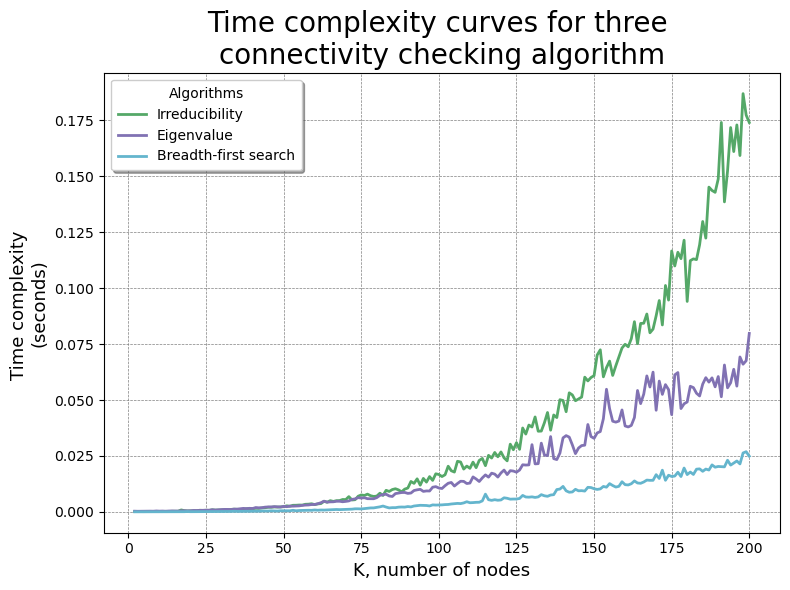

In [62]:
k = [x for x in range(2, 201)]
plt.figure(figsize=(8,6), tight_layout=True)
plt.style.use('default')
plt.plot(k, t_1, '-', linewidth=2,label = 'Irreducibility', color = col2[2])
plt.plot(k, t_2, '-', linewidth=2,label = 'Eigenvalue', color = col2[4])
plt.plot(k, t_3, '-', linewidth=2,label = 'Breadth-first search', color = col2[-1])
plt.xlabel('K, number of nodes', size=13)
plt.ylabel('Time complexity \n(seconds)', size=13)
plt.title('Time complexity curves for three \nconnectivity checking algorithm', size=20)
plt.legend(title='Algorithms', title_fontsize = 10, fontsize = 10,loc='upper left'
           ,fancybox=True, framealpha=1, shadow=True, borderpad=0.5)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.show()

## Probability that a Erdos-Renyi graph is connected over p

In [63]:
# setting the number of nodes
k = 100
# setting the number of iteration for the Monte Carlo simulation
M = 100

We'll compute the probability for p in (0.01,0.99) with a step of 0.01 and we'll use as connectivity checking algorithm the bread-first search.

In [64]:
p_list = [0.01 + i*0.01 for i in range(90)]

In [65]:
prob = []
# for each value of p
for p in p_list:
    result = []
    # running the simulation for the given p
    for m in range(M):
        G = nx.erdos_renyi_graph(k, p)               # cretaing the graph 
        result.append(len(bfs(G, 4)) == k)           # computing the connectivity checking using the BFS
    prob.append(sum(result)/M)                       # storing the result of the simulation

### PLOT

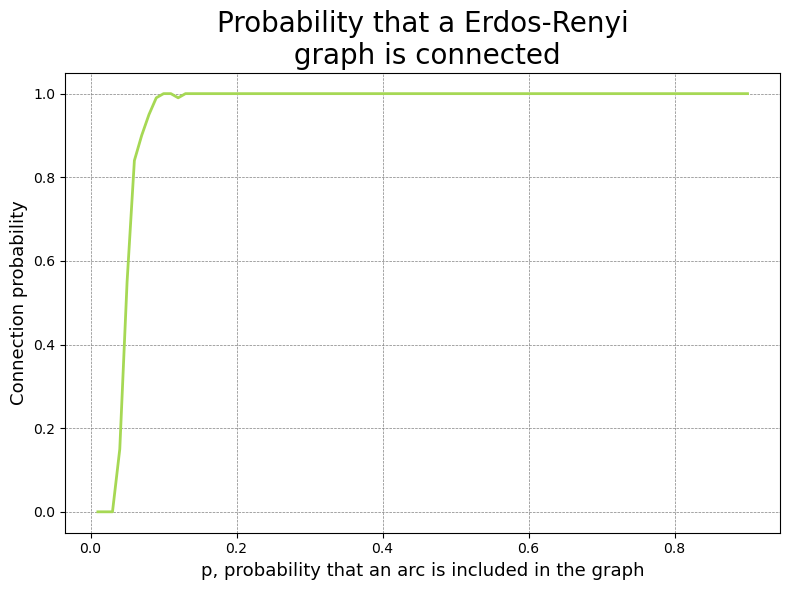

In [66]:
plt.figure(figsize=(8,6), tight_layout=True)
plt.style.use('default')
plt.plot(p_list, prob, '-', linewidth=2, color = col[4])
#plt.axvline(x=p_list[ind],linestyle = '--', color = 'grey',lw=2, label='starting point of connection\nprobability = 1')
plt.xlabel('p, probability that an arc is included in the graph', size=13)
plt.ylabel('Connection probability', size=13)
plt.title('Probability that a Erdos-Renyi\n graph is connected', size=20)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
#plt.legend(loc='lower right',fontsize = 8,fancybox=True, framealpha=1, shadow=True, borderpad=0.5)
plt.show()

## Probability that a r-regular random graph is connected over K

In [67]:
# setting the number of iteration for the Monte Carlo simulation
M = 100

We'll compute the probability for k in (3,100) when r = 2 and k in (9,100) when r = 8.

We'll use as connectivity checking algorithm the bread-first search.

FIRST CASE: r = 2

In [68]:
# setting r
r_1 = 2
# initializing the possible values for k
k_list_1 = [x for x in range(3, 101)]

In [69]:
prob_1 = [] 
# for each value of k
for k in k_list_1:
    result = []
    # running the simulation for the given k 
    for m in range(M):
        G = nx.random_regular_graph(r_1, k)    # creating the graph
        result.append(len(bfs(G, 1)) == k)   # computing the connectivity checking using the BFS
    prob_1.append(sum(result)/M)             # storing the result of the simulation

SECOND CASE: r = 8

In [70]:
# setting r
r_2 = 8
# initializing the possible value for k
k_list_2 = [x for x in range(9, 101)]

In [71]:
prob_2 = []
# for each value of k
for k in k_list_2:
    result = []
    # running the simulation for the given k
    for m in range(M):
        G = nx.random_regular_graph(r_2, k)         # creating the graph
        result.append(len(bfs(G, 1)) == k) # computing the connectivity checking using the BFS
    prob_2.append(sum(result)/M)                    # storing the result of the simulation

### PLOT

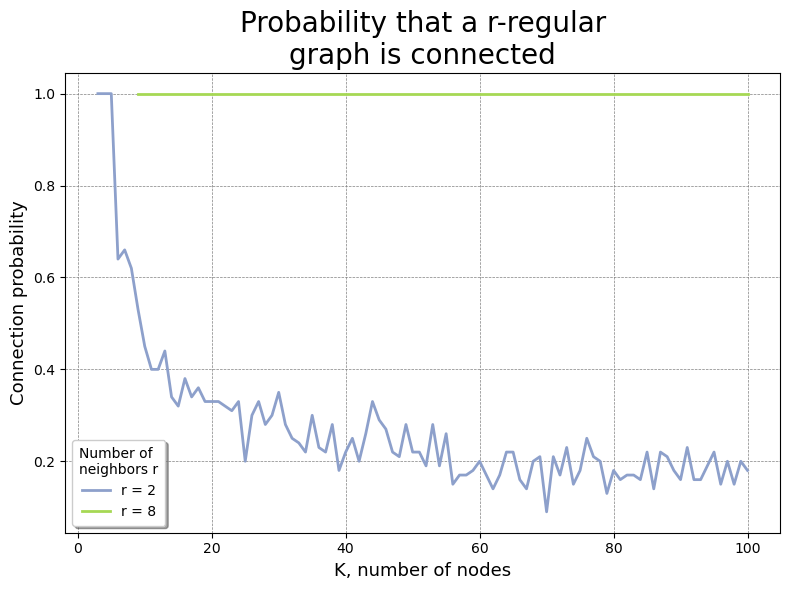

In [72]:
plt.figure(figsize=(8,6), tight_layout=True)
plt.style.use('default')
plt.plot(k_list_1, prob_1, '-', linewidth=2, color = col[2], label = 'r = 2')
plt.plot(k_list_2, prob_2, '-', linewidth=2, color = col[4], label = 'r = 8')
plt.xlabel('K, number of nodes', size=13)
plt.ylabel('Connection probability', size=13)
plt.title('Probability that a r-regular\ngraph is connected', size=20)
plt.legend(title='Number of \nneighbors r', title_fontsize = 10, fontsize = 10,loc='lower left'
           ,fancybox=True, framealpha=1, shadow=True, borderpad=0.5)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.show()

# Part 2

In [4]:
import fnss
import random
from tqdm import tqdm

### Initializing the numerical values

In [5]:
n = 64
C = 10
tau = 5*10**(-6)
L_f = 4*8000
L_o = 4*8000
E_X = 8*3600
T_0 = 30
csi = 0.1
f = 48./1500

Defining T baseline

In [6]:
R_baseline = T_0 + E_X

Defining S baseline

In [7]:
S_baseline = R_baseline + csi*R_baseline

### Creating fat tree topology

In [8]:
fat = fnss.fat_tree_topology(n)
fat_att = nx.get_node_attributes(fat,name = 'type')
servers = [item[0] for item in fat_att.items() if item[1]=='host']

### Creating jellyfish topology

To create a jellyfish topology, at first we generate a r-regular random graph with 2048 switches (nodes), each of them connected to 32 other switches. 

In [9]:
k = 2048
jelly = nx.random_regular_graph(32, k)
jelly_att = {i: 'switch' for i in jelly.nodes()}

Then we attach to each switch 32 servers.

In [10]:
jelly.add_nodes_from(list(range(2048, 65537+2048)))
for i in range(2048, 65537+2048):
    jelly_att[i] = 'host'
for i in range(2048):
    for j in range(2048+i*32, 2048+i*32+32):
        jelly.add_edge(i,j)

## Algorithm to evaluate the response time and the job running time 

In [13]:
def alg(topo,N,t,servers):
    
    server_A = random.choice(servers)
    servers.remove(server_A)
    d_f = (L_f/N)*(1+f)         # amount of input data
    
    sp = nx.shortest_path(topo, source=server_A , weight=True, method='dijkstra')

    # selecting the N nearest servers
    sel ={i:sp[i] for i in sp.keys() if t[i]=='host' and len(sp[i])>1}
    lung = sorted(list(sel.items()), key=lambda x: len(x[1]))[0:N]
    
    h = [len(elem[1])-1 for elem in lung] # number of hops from server A to the N nearest servers
    
    T_i = [2*tau*item for item in h]  
    denom = sum([1/x for x in T_i])
    Theta_i = [C/(x*denom) for x in T_i]
    
    s_t = [d_f/x for x in Theta_i]   #sending time
    
    X_i = np.random.exponential(scale=E_X/N, size=N) 
    
    d_o = np.random.uniform(0, 2*L_o/N, size=N) # amount of output data
    d_o = d_o*(1+f)
    r_t = [d_o[i]/Theta_i[i] for i in range(N)] # response time 
    
    tot_time = [sum(x) for x in zip(s_t, X_i, r_t)]
    tot_time = [T_0 + x for x in tot_time]
    return(max(tot_time)/R_baseline,(sum(X_i)+N*T_0)/S_baseline)

## Simulation to compute the mean response time and the job running cost

In [14]:
M = 100
time_jelly = []\
time_fat = []
job_jelly = []
job_fat = []
for N in tqdm(range(1,10002,100)):
    res_jelly_time = []
    res_fat_time = []
    res_jelly_job = []
    res_fat_job = []
    for i in range(1,M):
        j_ = alg(jelly,N,jelly_att,list(range(2048, 65537)))
        f_ = alg(fat,N,fat_att,servers)
        res_jelly_time.append(j_[0])
        res_fat_time.append(f_[0])
        res_jelly_job.append(j_[1])
        res_fat_job.append(f_[1])
    time_jelly.append(sum(res_jelly_time)/M)
    time_fat.append(sum(res_fat_time)/M)
    job_jelly.append(sum(res_jelly_time)/M+csi*(sum(res_jelly_job)/M))
    job_fat.append(sum(res_fat_time)/M+csi*(sum(res_fat_job)/M))

100%|█████████████████████████████████████████████████████████████████████████████| 101/101 [3:19:48<00:00, 118.70s/it]


In [17]:
N_list = [i for i in range(1,10002,100)]

# plot 1

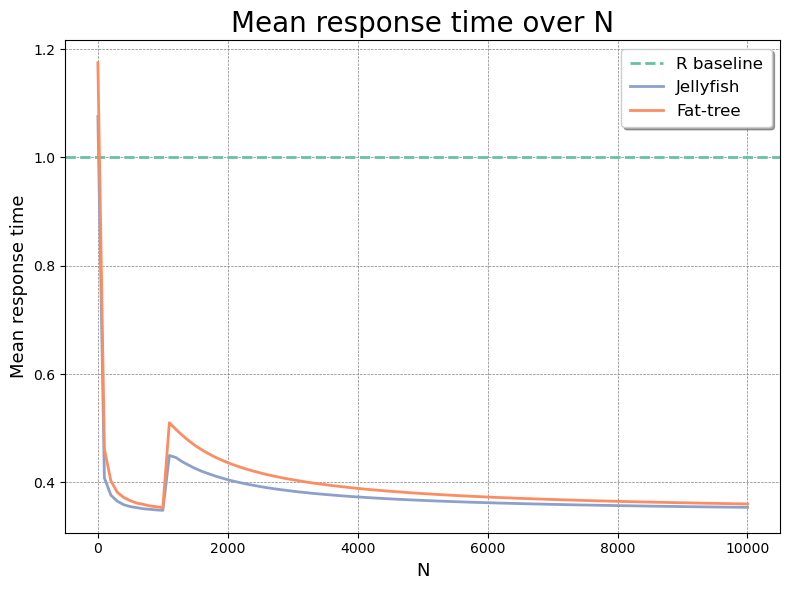

In [49]:
plt.figure(figsize=(8,6), tight_layout=True)
plt.style.use('default')
plt.axhline(y=1, linestyle='--', linewidth=2, color = col[0], label = 'R baseline')
plt.plot(N_list, time_jelly, '-', linewidth=2, color = col[2], label = 'Jellyfish')
plt.plot(N_list, time_fat, '-', linewidth=2, color = col[1], label = 'Fat-tree')
plt.xlabel('N', size=13)
plt.ylabel('Mean response time', size=13)
plt.title('Mean response time over N', size=20)
plt.legend(fontsize = 12, loc='upper right'
           ,fancybox=True, framealpha=1, shadow=True, borderpad=0.5)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.show()

# plot 2

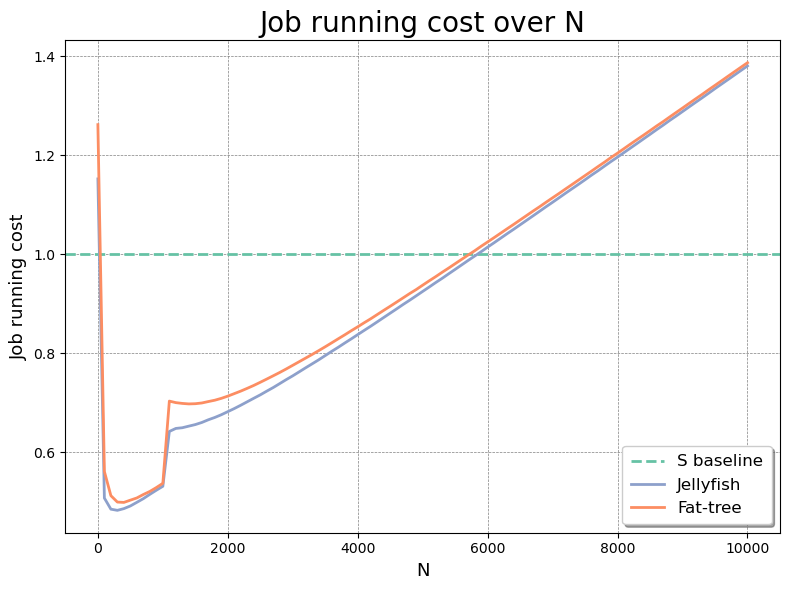

In [51]:
plt.figure(figsize=(8,6), tight_layout=True)
plt.style.use('default')
plt.axhline(y=1, linestyle='--', linewidth=2, color = col[0], label = 'S baseline')
plt.plot(N_list, job_jelly, '-', linewidth=2, color = col[2], label = 'Jellyfish')
plt.plot(N_list, job_fat, '-', linewidth=2, color = col[1], label = 'Fat-tree')
plt.xlabel('N', size=13)
plt.ylabel('Job running cost', size=13)
plt.title('Job running cost over N', size=20)
plt.legend(fontsize = 12,loc='lower right'
           ,fancybox=True, framealpha=1, shadow=True, borderpad=0.5)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.show()